<a href="https://colab.research.google.com/github/Wellxxzz/Wellxxzz/blob/principal/streaming_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
#Importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:

%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [77]:
#carregamento e visualição dos dados

df = pd.read_csv("/content/streaming_data.csv" ,sep =",")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [79]:
#Descrição estatística dos dados

df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [80]:
#Verificando os tipos dos dados

df.dtypes

,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [81]:
#Verificando se há dados nulos

df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [82]:
# Analisando quais colunas que possuem em percentual o maior número de dados faltantes

missing= df.isna().sum() / len(df) * 100
missing

,0
Age,14.479226
Gender,18.637974
Time_on_platform,27.502440
Devices_connected,32.340404
Subscription_type,32.382774
Num_streaming_services,87.709928
Num_active_profiles,0.000000
Avg_rating,22.174002
Churned,21.488367
User_id,0.000000


In [83]:
#Substituindo dados nulos por 0
columns_replace = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[columns_replace] = df[columns_replace].fillna(0)

print(df)

        Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0      49.0    Male            4700.0                3.0             Basic   
1      69.0  Female            6107.0                2.0          Standard   
2      44.0    Male            6374.0                3.0           Premium   
3      26.0    Male               0.0                5.0             Basic   
4      18.0     NaN            1948.0                3.0             Basic   
...     ...     ...               ...                ...               ...   
77879  45.0    Male               0.0                0.0             Basic   
77880  47.0  Female            6176.0                0.0           Premium   
77881  64.0  Female               0.0                5.0           Premium   
77882  58.0    Male            1314.0                5.0          Standard   
77883  68.0  Female            7078.0                1.0          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating 

In [84]:
#Dropando linhas nulas
df = df.dropna(subset=['Gender', 'Subscription_type', 'Age'])

In [85]:
#Transformando valores em Sim e Não
df['Churned'] = df['Churned'].map({0: 'No', 1: 'Yes'})

<ipython-input-85-7ee1caa2e0af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Churned'].map({0: 'No', 1: 'Yes'})


In [86]:
# Verificando a quantidades de churn ocorrida
df["Churned"].value_counts()

,count
Churned,
No,29459
Yes,7056


In [87]:
churn_agg = df.groupby("Churned")["User_id"].count().reset_index()


<Axes: xlabel='Churned', ylabel='User_id'>

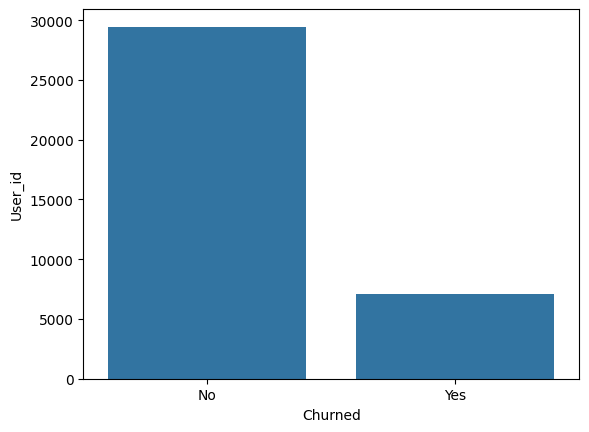

In [88]:
sns.barplot(data= churn_agg, x="Churned", y="User_id")

In [89]:
#Transformando números floats em inteiros
df = df.apply(lambda x: x.astype(int) if x.dtype == 'float' else x)

print(df)

       Age  Gender  Time_on_platform  Devices_connected Subscription_type  \
0       49    Male              4700                  3             Basic   
1       69  Female              6107                  2          Standard   
2       44    Male              6374                  3           Premium   
3       26    Male                 0                  5             Basic   
5       54    Male              3024                  2             Basic   
...    ...     ...               ...                ...               ...   
77879   45    Male                 0                  0             Basic   
77880   47  Female              6176                  0           Premium   
77881   64  Female                 0                  5           Premium   
77882   58    Male              1314                  5          Standard   
77883   68  Female              7078                  1          Standard   

       Num_streaming_services  Num_active_profiles  Avg_rating Churned  \
0

In [90]:
#Definindo variavés categóricas e numéricas

cat_vars = ['Gender', 'Subscription_type', 'Churned']
num_vars = ['Time_on_platform', 'Num_streaming_services', 'Avg_rating', 'Devices_connected', 'Age']

modeling_vars= cat_vars + num_vars


In [91]:
#definindo X e Y
X= df.filter(modeling_vars).copy
y= df['Churned'].copy

In [92]:
y = pd.DataFrame()

In [93]:
# Tratando os dados para Machine Learning

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

le.fit(df["Churned"])
y["Churned"]=le.transform(df["Churned"])

In [94]:
y

,Churned
0,0
1,0
2,1
3,0
4,0
...,...
36510,0
36511,0
36512,1
36513,0


In [95]:
X= pd.get_dummies(df[cat_vars])

In [96]:
X

,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned_No,Churned_Yes
0,False,True,True,False,False,True,False
1,True,False,False,False,True,True,False
2,False,True,False,True,False,False,True
3,False,True,True,False,False,True,False
5,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...
77879,False,True,True,False,False,True,False
77880,True,False,False,True,False,True,False
77881,True,False,False,True,False,False,True
77882,False,True,False,False,True,True,False


In [97]:
# Treinando os dados

from sklearn.preprocessing import MinMaxScaler

mm= MinMaxScaler()

X= pd.DataFrame(mm.fit_transform(X), columns=X.columns)

In [98]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25)

In [99]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [100]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


lr= model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [101]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [102]:
X_test.assign(Churn=y_test).assign(label=lr.predict(X_test))

,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned_No,Churned_Yes,Churn,label
21729,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
26355,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
30692,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2652,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
21211,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
28737,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
28816,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
11262,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
18061,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0


In [103]:
# Matriz de confusão para a visualização do desempenho do modelo de classificação

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test, lr.predict(X_test))
cm


array([[5865,    0],
       [   0, 1438]])

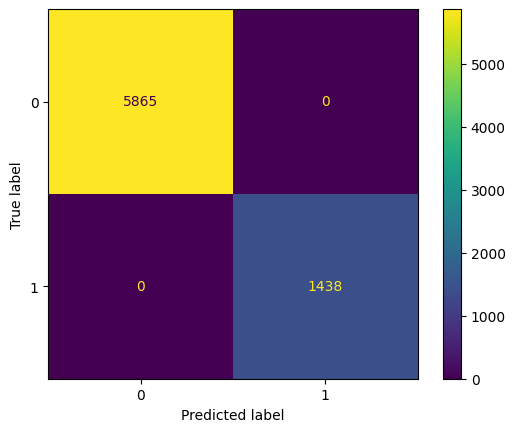

In [104]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(values_format='d')

In [105]:
# Testando os modelos

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Acurácia Balanceada (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {precision_score(y_test, lr.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")

print(f"F1 Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Score (Teste): {f1_score(y_test, lr.predict(X_test))}")

print(f"ROC AUC Score (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROC AUC Score (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")


Acurácia (Treino): 1.0
Acurácia (Teste): 1.0
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 1.0
Recall (Treino): 1.0
Recall (Teste): 1.0
F1 Score (Treino): 1.0
F1 Score (Teste): 1.0
ROC AUC Score (Treino): 1.0
ROC AUC Score (Teste): 1.0


In [106]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier()

rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [107]:

rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [108]:
X_test.assign(Churned=y_test).assign(label=rf.predict(X_test))

,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned_No,Churned_Yes,Churned,label
21729,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
26355,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
30692,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2652,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
21211,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
28737,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
28816,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
11262,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
18061,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0


In [109]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test, rf.predict(X_test))
cm

array([[5865,    0],
       [   0, 1438]])

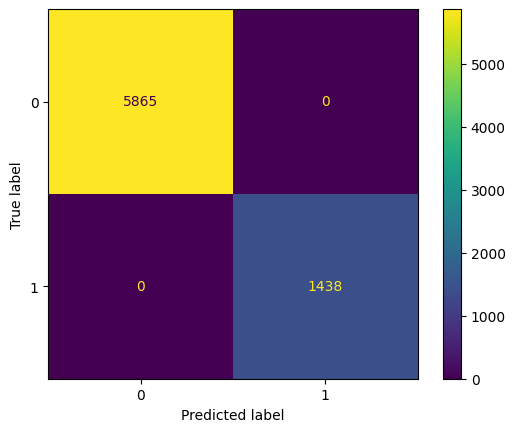

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot(values_format='d')

In [111]:
print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")

print(f"Acurácia Balanceada (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {precision_score(y_test, rf.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")

print(f"F1 Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1 Score (Teste): {f1_score(y_test, rf.predict(X_test))}")

print(f"ROC AUC Score (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROC AUC Score (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 1.0
Acurácia (Teste): 1.0
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 1.0
Recall (Treino): 1.0
Recall (Teste): 1.0
F1 Score (Treino): 1.0
F1 Score (Teste): 1.0
ROC AUC Score (Treino): 1.0
ROC AUC Score (Teste): 1.0


In [112]:
#Tunando os modelos

from sklearn.model_selection import GridSearchCV

parameters= {"max_depth": [1,2,3,4,5,6,7,8,9,10],
             "n_estimators": [100,300,500]}

grid_search= GridSearchCV(rf, parameters, scoring="accuracy", cv=5, n_jobs=-1)



In [113]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [114]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [115]:
rf_tunned = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=1,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    n_estimators=100,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)




In [116]:
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=1)

In [117]:
#Treinando os dados após tuna-lós
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [118]:

X_test.assign(Churn=y_test).assign(label=rf_tunned.predict(X_test))

,Gender_Female,Gender_Male,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard,Churned_No,Churned_Yes,Churn,label
21729,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
26355,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,0
30692,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
2652,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
21211,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...
28737,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1,1
28816,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,0
11262,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
18061,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0,0


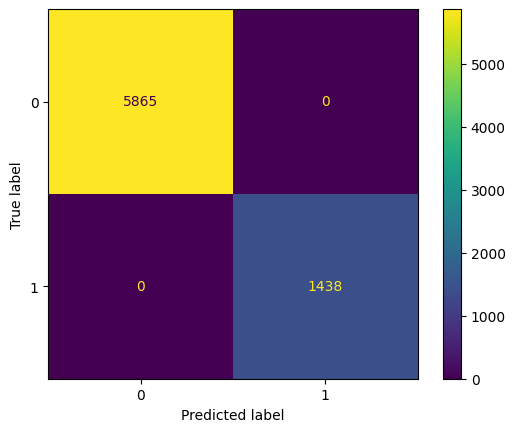

In [119]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_tunned.classes_)
disp.plot(values_format='d')

In [120]:
# Resultado dos modelos após o tunnig
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")

print(f"Acurácia Balanceada (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")

print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")

print(f"F1 Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1 Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")

print(f"ROC AUC Score (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROC AUC Score (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")


Acurácia (Teste): 1.0
Acurácia Balanceada (Treino): 1.0
Acurácia Balanceada (Teste): 1.0
Recall (Treino): 1.0
Recall (Teste): 1.0
F1 Score (Treino): 1.0
F1 Score (Teste): 1.0
ROC AUC Score (Treino): 1.0
ROC AUC Score (Teste): 1.0
